In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ulka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load Dataset

In [3]:
temp_df = pd.read_csv('Suicide_Detection.csv')
df = temp_df.iloc[:40000]
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


### Feature Selection

In [4]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

C:\Users\Ulka\AppData\Local\Temp\ipykernel_13700\578740447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0'],axis=1, inplace=True)


,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


### Class distribution

In [5]:
# no imbalaced classes
df['class'].value_counts()

class
non-suicide    20076
suicide        19924
Name: count, dtype: int64

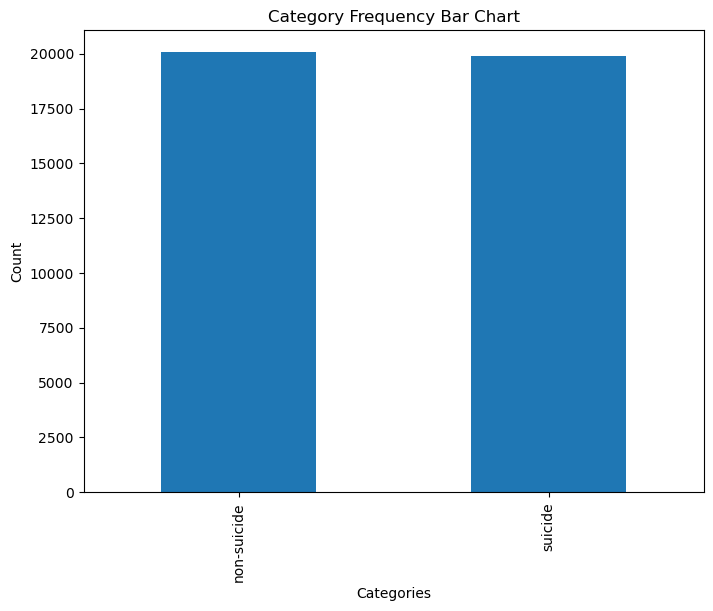

In [6]:
import matplotlib.pyplot as plt
# Plotting with Matplotlib
category_counts = df['class'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')

# Adding titles and labels
plt.title('Category Frequency Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show plot
plt.show()


### Check for null values or duplicate values

In [7]:
Null_value=df.isnull().sum()
dupli=df.duplicated().sum()
print("NUll: ",Null_value)
print("Duplicate: ",dupli)

NUll:  text     0
class    0
dtype: int64
Duplicate:  0


### Checking for Outlier[word count]

In [8]:
# Function to calculate word count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df.head()

C:\Users\Ulka\AppData\Local\Temp\ipykernel_13700\2413303214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].apply(lambda x: len(x.split()))


,text,class,word_count
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,143
1,Am I weird I don't get affected by compliments...,non-suicide,27
2,Finally 2020 is almost over... So I can never ...,non-suicide,26
3,i need helpjust help me im crying so hard,suicide,9
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,438


In [9]:
df['word_count'].describe()

count    40000.000000
mean       130.577475
std        212.351000
min          1.000000
25%         26.000000
50%         61.000000
75%        154.000000
max       7514.000000
Name: word_count, dtype: float64

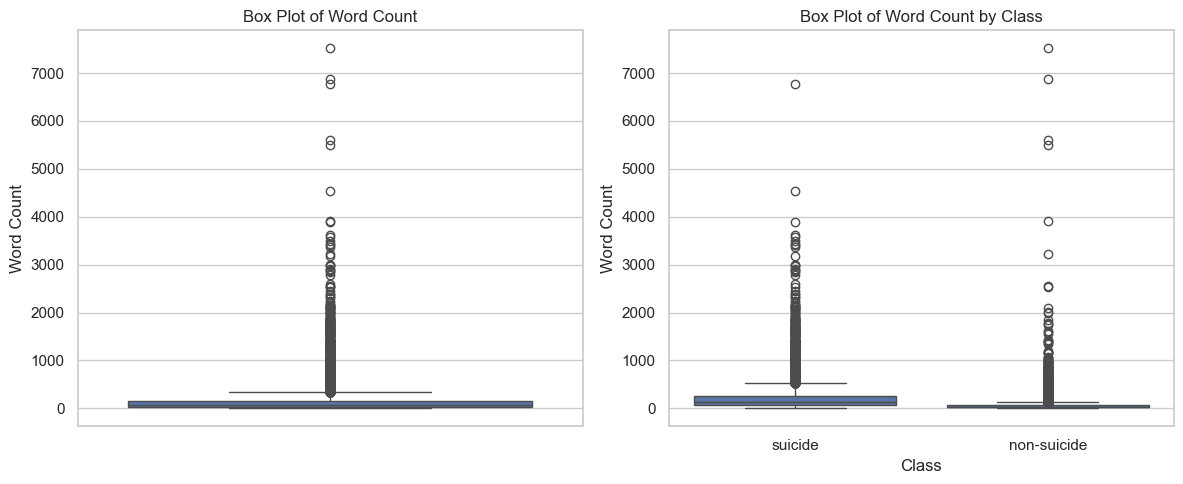

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the visualisation style
sns.set(style="whitegrid")

# Create the first box plot for word count
plt.figure(figsize=(12, 5))

# Box plot of word count
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df['word_count'])
plt.title('Box Plot of Word Count')
plt.ylabel('Word Count')

# Create the second box plot for word count + class
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x='class', y='word_count', data=df)
plt.title('Box Plot of Word Count by Class')
plt.xlabel('Class')
plt.ylabel('Word Count')

# Show the plots
plt.tight_layout()
plt.show()


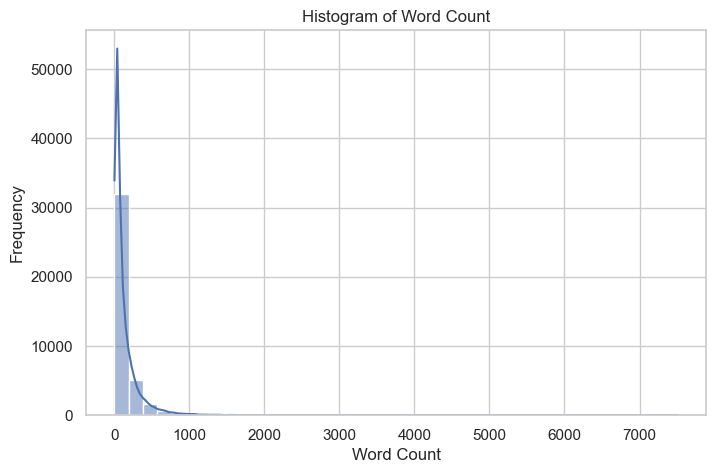

In [11]:
# Plot the histogram of word counts
plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=40, kde=True)
plt.title('Histogram of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

### Removing Outlier[word count]

In [12]:
# As variance is high and between Q1 and Q3 only and data is not concern for us here rather then output.
# as too short or too long sentences create overfitting or underfitting. 

# Calculate Q1 and Q3
P20 = df['word_count'].quantile(0.20)
P80 = df['word_count'].quantile(0.80)
print(P20,"and",P80)
# Define lower and upper bounds for filtering
lower_bound = P20
upper_bound = P80

# Filter the DataFrame to remove outliers
df = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]

df.head()

22.0 and 189.0


,text,class,word_count
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,143
1,Am I weird I don't get affected by compliments...,non-suicide,27
2,Finally 2020 is almost over... So I can never ...,non-suicide,26
10,I took the rest of my sleeping pills and my pa...,suicide,29
11,Can you imagine getting old? Me neither.Wrinkl...,suicide,74


In [13]:
df['word_count'].describe()

count    24401.000000
mean        73.693168
std         45.484209
min         22.000000
25%         36.000000
50%         60.000000
75%        103.000000
max        189.000000
Name: word_count, dtype: float64

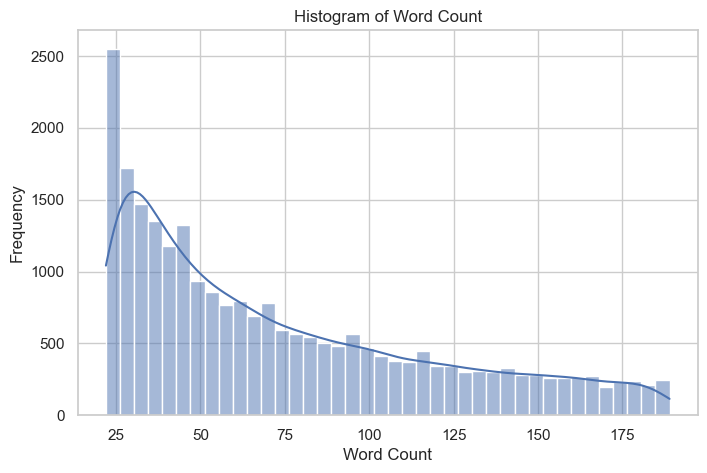

In [14]:
# Plot the histogram of word counts
plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=40, kde=True)
plt.title('Histogram of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Reducing imbalance between 2 class with word count

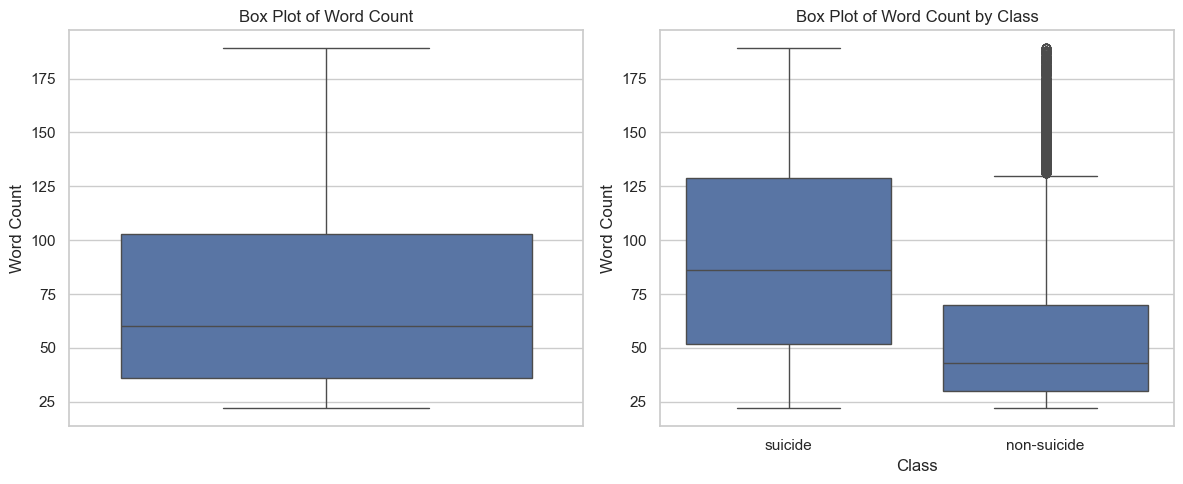

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the visualisation style
sns.set(style="whitegrid")

# Create the first box plot for word count
plt.figure(figsize=(12, 5))

# Box plot of word count
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df['word_count'])
plt.title('Box Plot of Word Count')
plt.ylabel('Word Count')

# Create the second box plot for word count + class
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x='class', y='word_count', data=df)
plt.title('Box Plot of Word Count by Class')
plt.xlabel('Class')
plt.ylabel('Word Count')

# Show the plots
plt.tight_layout()
plt.show()


In [16]:
# Group by class and calculate summary statistics for word count
class_stats = df.groupby('class')['word_count'].describe()
# Print the class-wise statistics
print("Class-wise Word Count Statistics:")
print(class_stats)


Class-wise Word Count Statistics:
               count       mean        std   min   25%   50%    75%    max
class                                                                     
non-suicide  12619.0  56.333703  36.708190  22.0  30.0  43.0   70.0  189.0
suicide      11782.0  92.285860  46.616031  22.0  52.0  86.0  129.0  189.0


In [17]:
# Filter the dataset to include rows where word count is between 50 and 125 (inclusive)
df = df[(df['word_count'] >= 50) & (df['word_count'] <= 125)]
# Verify the class distribution after filtering
print("\nClass distribution after filtering:")
print(df['class'].value_counts())


Class distribution after filtering:
class
suicide        5980
non-suicide    4304
Name: count, dtype: int64


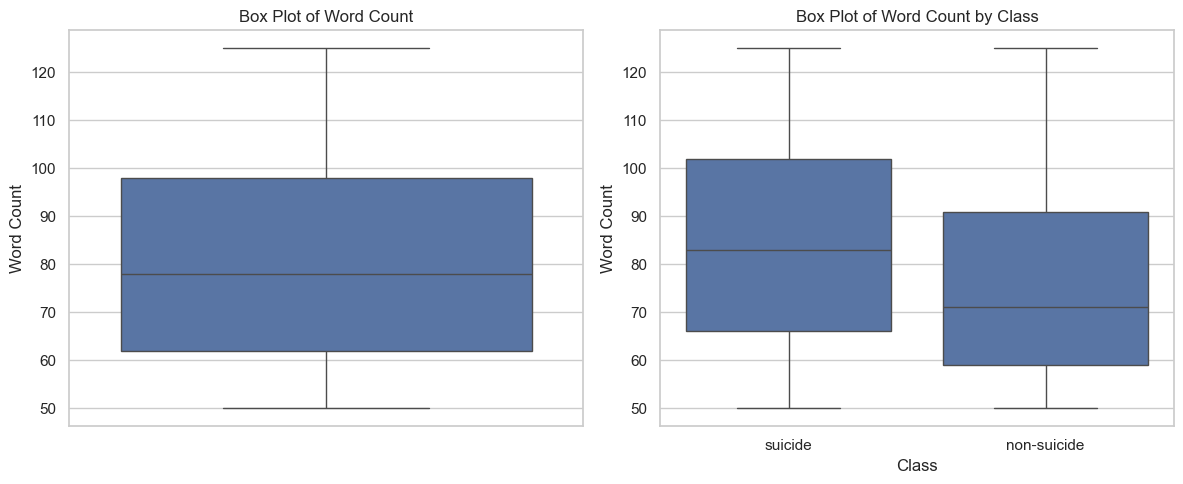

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the visualisation style
sns.set(style="whitegrid")

# Create the first box plot for word count
plt.figure(figsize=(12, 5))

# Box plot of word count
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df['word_count'])
plt.title('Box Plot of Word Count')
plt.ylabel('Word Count')

# Create the second box plot for word count + class
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x='class', y='word_count', data=df)
plt.title('Box Plot of Word Count by Class')
plt.xlabel('Class')
plt.ylabel('Word Count')

# Show the plots
plt.tight_layout()
plt.show()


### Balancing the suicide & non-suicide count

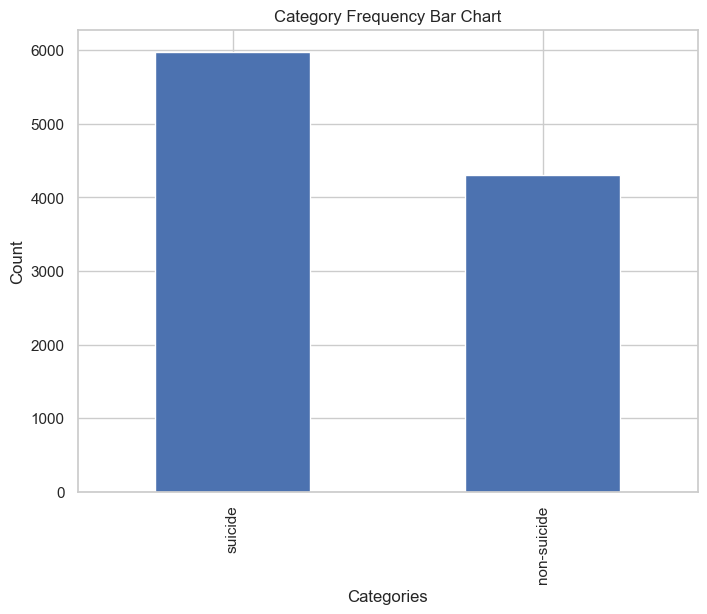

In [19]:
import matplotlib.pyplot as plt


# Plotting with Matplotlib
category_counts = df['class'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')

# Adding titles and labels
plt.title('Category Frequency Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show plot
plt.show()


In [20]:
# Step 1: Separate classes
df_suicide = df[df['class'] == 'suicide']
df_non_suicide = df[df['class'] == 'non-suicide']

# Step 2: Balance each class to 2000 samples
df_suicide_balanced = df_suicide.sample(n=4304, random_state=42) if len(df_suicide) >= 4304 else df_suicide
df_non_suicide_balanced = df_non_suicide.sample(n=4304, random_state=42) if len(df_non_suicide) >= 4304 else df_non_suicide

# Step 3: Combine balanced classes
df_balanced = pd.concat([df_suicide_balanced, df_non_suicide_balanced])

# Shuffle the dataset to mix the classes
df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Plotting with Matplotlib
category_counts = df_balanced['class'].value_counts()

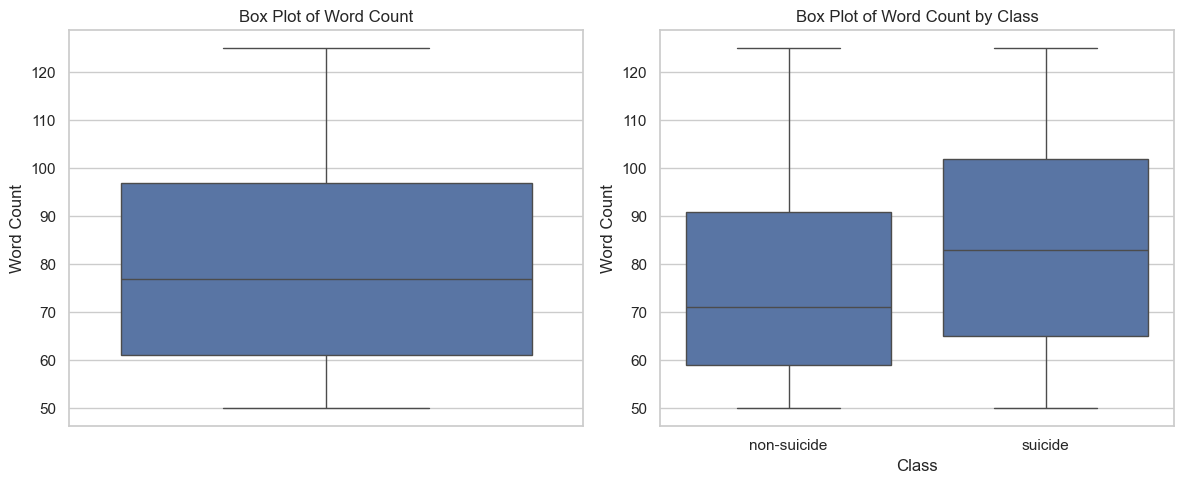

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the visualisation style
sns.set(style="whitegrid")

# Create the first box plot for word count
plt.figure(figsize=(12, 5))

# Box plot of word count
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df['word_count'])
plt.title('Box Plot of Word Count')
plt.ylabel('Word Count')

# Create the second box plot for word count + class
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x='class', y='word_count', data=df)
plt.title('Box Plot of Word Count by Class')
plt.xlabel('Class')
plt.ylabel('Word Count')

# Show the plots
plt.tight_layout()
plt.show()


In [22]:
# Group by class and calculate summary statistics for word count
class_stats = df.groupby('class')['word_count'].describe()
# Print the class-wise statistics
print("Class-wise Word Count Statistics:")
print(class_stats)

Class-wise Word Count Statistics:
              count       mean        std   min   25%   50%    75%    max
class                                                                    
non-suicide  4304.0  75.986757  20.540490  50.0  59.0  71.0   91.0  125.0
suicide      4304.0  84.365474  21.812993  50.0  65.0  83.0  102.0  125.0


# Data Preprocessing

### Convert in Lower

In [23]:
df['text'] = df['text'].apply(lambda x : x.lower())
df.head()

,text,class,word_count
0,horny horns horny someone just dared me to edg...,non-suicide,50
1,waiting for the perfect momentwaiting for the ...,suicide,105
2,to those who care i’m just a dude who wants lo...,non-suicide,58
3,i just want to end it.i hate evrything about m...,suicide,60
4,it doesn't really matter if i'm here or not.th...,suicide,70


### Remove punctuation

In [24]:
import string

# Apply remove punctuation function
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df.head()

,text,class,word_count
0,horny horns horny someone just dared me to edg...,non-suicide,50
1,waiting for the perfect momentwaiting for the ...,suicide,105
2,to those who care i’m just a dude who wants lo...,non-suicide,58
3,i just want to end iti hate evrything about me...,suicide,60
4,it doesnt really matter if im here or notthe s...,suicide,70


### Tokenize

In [25]:
from nltk.tokenize import word_tokenize

# Apply tokenize function
df['text'] = df['text'].apply(lambda x: word_tokenize(x))
df.head()

,text,class,word_count
0,"[horny, horns, horny, someone, just, dared, me...",non-suicide,50
1,"[waiting, for, the, perfect, momentwaiting, fo...",suicide,105
2,"[to, those, who, care, i, ’, m, just, a, dude,...",non-suicide,58
3,"[i, just, want, to, end, iti, hate, evrything,...",suicide,60
4,"[it, doesnt, really, matter, if, im, here, or,...",suicide,70


### Remove Stopword

In [26]:
from nltk.corpus import stopwords
# Apply remove stop words function
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df.head()

,text,class,word_count
0,"[horny, horns, horny, someone, dared, edge, th...",non-suicide,50
1,"[waiting, perfect, momentwaiting, first, rave,...",suicide,105
2,"[care, ’, dude, wants, love, mean, hard, girls...",non-suicide,58
3,"[want, end, iti, hate, evrything, life, believ...",suicide,60
4,"[doesnt, really, matter, im, notthe, sun, stil...",suicide,70


In [27]:
# Apply clean tokens function
df['text'] = df['text'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha()])
df.head()

,text,class,word_count
0,"[horny, horns, horny, someone, dared, edge, th...",non-suicide,50
1,"[waiting, perfect, momentwaiting, first, rave,...",suicide,105
2,"[care, dude, wants, love, mean, hard, girls, t...",non-suicide,58
3,"[want, end, iti, hate, evrything, life, believ...",suicide,60
4,"[doesnt, really, matter, im, notthe, sun, stil...",suicide,70


### POS tagging
    accuracy decreases with it

In [28]:
# import nltk
# from nltk import word_tokenize, pos_tag

# # Download NLTK POS tagger and tokenizer if you haven't
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')


# # Define POS tags that are important for depression detection
# IMPORTANT_POS = {"JJ", "JJR", "JJS", "RB", "RBR", "RBS", "PRP", "PRP$", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"}

# def filter_important_pos_nltk(text):

    
#     # Get POS tags for each token
#     tagged_tokens = pos_tag(text)
    
#     # Keep only tokens that have important POS tags

    
#     # Return filtered tokens as a string or a list
#     return [word for word, pos in tagged_tokens if pos in IMPORTANT_POS]


# df['text'] = df['text'].apply(
#     lambda x: filter_important_pos_nltk(x)
# )

# df.head()


### Stemming

In [29]:
# from nltk.stem import PorterStemmer
# # Initialize the Porter Stemmer
# stemmer = PorterStemmer()

# # Function to apply stemming
# def stem_tokens(tokens):
#     return [stemmer.stem(word) for word in tokens]

# # Apply the cleaning functions and stemming to the 'tokenized_review' column
# df['text'] = df['text'].apply(stem_tokens)

# # Output the cleaned and stemmed DataFrame
# df.head()


### Lemmetization

In [30]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download WordNet data if you haven't already
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ulka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply the cleaning functions and lemmatization to the 'tokenized_review' column
df['text'] = df['text'].apply(lemmatize_tokens)

# Output the cleaned and lemmatized DataFrame
df.head()


,text,class,word_count
0,"[horny, horn, horny, someone, dared, edge, thr...",non-suicide,50
1,"[waiting, perfect, momentwaiting, first, rave,...",suicide,105
2,"[care, dude, want, love, mean, hard, girl, thi...",non-suicide,58
3,"[want, end, iti, hate, evrything, life, believ...",suicide,60
4,"[doesnt, really, matter, im, notthe, sun, stil...",suicide,70


### Join tokenized list

In [32]:
# Join the tokenized lists into strings for CountVectorizer
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))
df.head()

,text,class,word_count
0,horny horn horny someone dared edge three time...,non-suicide,50
1,waiting perfect momentwaiting first rave coron...,suicide,105
2,care dude want love mean hard girl think guy w...,non-suicide,58
3,want end iti hate evrything life believe made ...,suicide,60
4,doesnt really matter im notthe sun still come ...,suicide,70


# Model building

### Devide dependent and independent

In [33]:
X = df.iloc[:,0:1]
y = df['class']
X

,text
0,horny horn horny someone dared edge three time...
1,waiting perfect momentwaiting first rave coron...
2,care dude want love mean hard girl think guy w...
3,want end iti hate evrything life believe made ...
4,doesnt really matter im notthe sun still come ...
...,...
8603,world kinda boring everyone life way wake brus...
8604,fuck surgerymedicine free u funded entirely go...
8605,people like cant post image bro sin eye lord p...
8606,cant seem shove feeling anymorei keep thinking...


In [34]:
y

0       non-suicide
1           suicide
2       non-suicide
3           suicide
4           suicide
           ...     
8603    non-suicide
8604    non-suicide
8605    non-suicide
8606        suicide
8607    non-suicide
Name: class, Length: 8608, dtype: object

### Encode Category

In [35]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [36]:
#suicide=1, non-suicide=0
y

array([0, 1, 0, ..., 0, 1, 0])

### Train Test Split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
X_train.shape

(6886, 1)

### Text to Numeric counts
    vectorization- default unigram

In [39]:
cv = CountVectorizer()

## Normalize the data

In [40]:
X_train_bow = cv.fit_transform(X_train['text']).toarray()  # normalizes it
X_test_bow = cv.transform(X_test['text']).toarray()        #normalizes with train value so model donnt get idea of other data

### Total 14707 column created

In [41]:
X_train_bow.shape

(6886, 18084)

### Model fitting

In [42]:
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

### Performance Measure

In [43]:
y_pred = gnb.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.740418118466899

In [44]:
confusion_matrix(y_test,y_pred)

array([[550, 334],
       [113, 725]], dtype=int64)

### Bigram Approach

In [45]:
# For unigrams and bigrams
cv2 = CountVectorizer(ngram_range=(1, 2), max_features=20000)  # This includes both unigrams and bigrams
X_train_bow2 = cv2.fit_transform(X_train['text']).toarray()
X_test_bow2 = cv2.transform(X_test['text']).toarray()

In [46]:
X_train_bow2.shape

(6886, 20000)

In [47]:
gnb2 = GaussianNB()

gnb2.fit(X_train_bow2,y_train)

GaussianNB()

In [48]:
y_pred = gnb2.predict(X_test_bow2)

accuracy_score(y_test,y_pred)

0.8426248548199767

In [49]:
confusion_matrix(y_test,y_pred)

array([[722, 162],
       [109, 729]], dtype=int64)

### Trigram Approach    

In [50]:
# trigram
cv3 = CountVectorizer(ngram_range=(1, 3), max_features=10000)  # This includes both unigrams and bigrams
X_train_bow3 = cv3.fit_transform(X_train['text']).toarray()
X_test_bow3 = cv3.transform(X_test['text']).toarray()
gnb3 = GaussianNB()

gnb3.fit(X_train_bow3,y_train)
y_pred = gnb3.predict(X_test_bow3)

accuracy_score(y_test,y_pred)

0.8559814169570267

#  Default Behavior of GaussianNB:
    Default Smoothing: The GaussianNB model has a default var_smoothing parameter set to a very small value (approximately 1e-9). Therefore, unless you specifically set a significantly different value for var_smoothing, both instances of the model might behave the same way.

In [51]:

cv4 = CountVectorizer(ngram_range=(1, 3), max_features=10000)  # This includes both unigrams and bigrams
X_train_bow4 = cv4.fit_transform(X_train['text']).toarray()
X_test_bow4 = cv4.transform(X_test['text']).toarray()
gnb4 = GaussianNB(var_smoothing=1e-9)

gnb4.fit(X_train_bow4,y_train)
y_pred = gnb4.predict(X_test_bow4)

accuracy_score(y_test,y_pred)

0.8559814169570267